In [46]:
# import libraries
import cobra
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
import statsmodels
from scipy.stats import sem, t
from scipy import mean
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns
from scipy.stats import hypergeom
%matplotlib inline

In [47]:
# Import differential flux analysis data
rxnlist=pd.read_csv('T2D_R_data_sigFC.csv')

In [48]:
# Import subsystem file
subs=pd.read_csv('HumanGem_Subsytems.csv')

In [ ]:
# Pathway enrichment analysis

In [49]:
dataset=pd.DataFrame()
for path in subs['Var2'].unique():
    reaction_set=subs.loc[subs['Var2']==path,'Var1']
    rxn=reaction_set.reset_index(drop=True)
    df_temp=pd.DataFrame({path:rxn})
    dataset=pd.concat([dataset,df_temp],axis=1)

In [50]:
listSize=len(rxnlist)
listrxnSize=[]
setSize=[]
rxnSize=13025

for col in dataset.columns:
    df=pd.DataFrame({'Reaction':dataset[col]})
    out=df.merge(rxnlist)
    listrxnSize.append(len(out))
    setSize.append(len(dataset[col].dropna()))

hyperdata=pd.DataFrame({'Pathways':dataset.columns,'ListReactions':listrxnSize,'SetSize':setSize})

In [51]:
hits=hyperdata['ListReactions']
pool=hyperdata['SetSize']
allrxns=hyperdata['SetSize'].sum()
targetrxns=hyperdata['ListReactions'].sum()

In [52]:
allrxns

7729

In [53]:
pvalList=[]
for h,p in zip(hits,pool):
    rv=hypergeom(allrxns-p,p,targetrxns)
    pval=rv.pmf(h)
    pvalList.append(pval)

hyperdata['P-value']=pvalList
reject,padj,_,_=statsmodels.stats.multitest.multipletests(hyperdata['P-value'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
hyperdata['P-valueadj']=padj
hyperdata['Reject']=reject

In [54]:
pvalList

[0.1617606306028057,
 0.1617606306028057,
 0.2197331917624816,
 0.16006757271832986,
 0.3141618499950673,
 0.08196511128887687,
 0.10877881129489828,
 0.3495319773817231,
 0.2829433925848253,
 0.1654187883896111,
 0.18403104478622914,
 2.441246886091904e-05,
 0.030435384406585917,
 0.00013046161408355875,
 0.49076154366427693,
 0.23314848050714929,
 0.11737748194540237,
 0.3655154702422332,
 0.2009285611880162,
 0.23314848050714929,
 0.023880920683744408,
 0.05115445058106455,
 0.34865748242579303,
 0.00011075175891508823,
 0.49076154366427693,
 0.140432373495362,
 0.1679910602715625,
 0.3435013092913061,
 0.0018220971257024642,
 3.105066458101587e-08,
 0.448909321667301,
 0.08501552795031055,
 0.5364962444743602,
 0.22661870107891696,
 0.3274142137928418,
 0.7007463528843606,
 0.20089686151260167,
 0.410611374511582,
 0.5364962444743602,
 2.2991731062074997e-31,
 0.007148658911486556,
 0.1924590546587502,
 5.646096751764438e-32,
 9.988845751462385e-10,
 0.1679910602715625,
 9.24128576

In [55]:
targetrxns

657

In [56]:
pval

0.9149844720496894

In [57]:
df = hyperdata.sort_values(by='ListReactions',ascending=False)

In [58]:
df

,Pathways,ListReactions,SetSize,P-value,P-valueadj,Reject
29,Transport reactions,207,2243,3.105066e-08,7.089902e-07,True
135,Exchange/demand reactions,47,881,3.304802e-07,6.467970e-06,True
124,Fatty acid oxidation,46,374,5.347501e-03,3.052532e-02,True
39,Fatty acid activation (cytosolic),44,67,2.299173e-31,1.574934e-29,True
58,Carnitine shuttle (mitochondrial),32,109,2.100970e-10,7.195822e-09,True
...,...,...,...,...,...,...
83,Formation and hydrolysis of cholesterol esters,0,132,5.852279e-06,8.805865e-05,True
82,Estrogen metabolism,0,51,1.027814e-02,5.215203e-02,False
80,Cholesterol biosynthesis 3 (Kandustch-Russell ...,0,15,2.627581e-01,3.955809e-01,False
32,Protein degradation,0,7,5.364962e-01,6.074379e-01,False


In [59]:
df.to_csv("T2D_R_Pathway_enrichment.csv")

In [60]:
hyperdata_sig=hyperdata[(hyperdata['Reject']) & (hyperdata['ListReactions']!=0)]
hyperdata_sorted=hyperdata_sig.sort_values(by='P-valueadj',ascending=False)

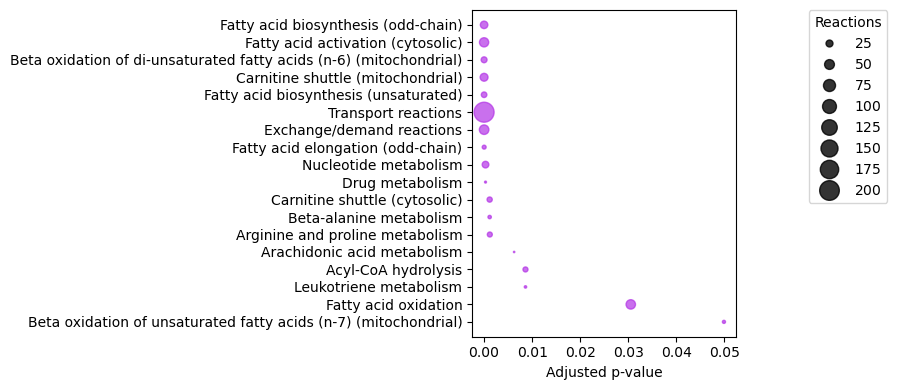

In [61]:
plt.figure(figsize=(14,4))

sc=plt.scatter(hyperdata_sorted['P-valueadj'],np.arange(0,len(hyperdata_sorted['Pathways'])),s=hyperdata_sorted['ListReactions'],color=(0.7,0.2,0.9,0.7))
plt.xlabel('Adjusted p-value')
plt.yticks(np.arange(0,len(hyperdata_sorted['Pathways'])),labels=hyperdata_sorted['Pathways'])
handles, labels = sc.legend_elements(prop="sizes", alpha=0.8)
plt.legend(handles, labels, bbox_to_anchor=(1.6,1.02),loc='upper right',title="Reactions")
# plt.grid(axis='y')
plt.tight_layout()
plt.savefig('T2D_R_pic_sigFC.png',dpi=600)